# University Student Admission Prediction

**Objective**: End to end project to implement till deployment a regression Machine learning model.
    
**Problem Statement**: Predict the chance of admission of a student in an University based on:
- General test score (GRE).
- Test of English as a Foreign Languge score (TOEFL).
- University rating.
- Statement of Purpose (SOP).
- Letter of Recommendation (LOR). 
- Cumulative Grade Point Average (CGPA).

**Dataset**: Admission_Prediction.csv (https://www.kaggle.com/adityadeshpande23/admissionpredictioncsv)

## EDA and Feature Engineering

In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pickle

/home/xavier/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
data = pd.read_csv("Admission_Prediction.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [5]:
data.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
# Check null values
data.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [3]:
# Fill null data
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])

In [8]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
# Droping unuseful columns
data = data.drop(columns=["Serial No."])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


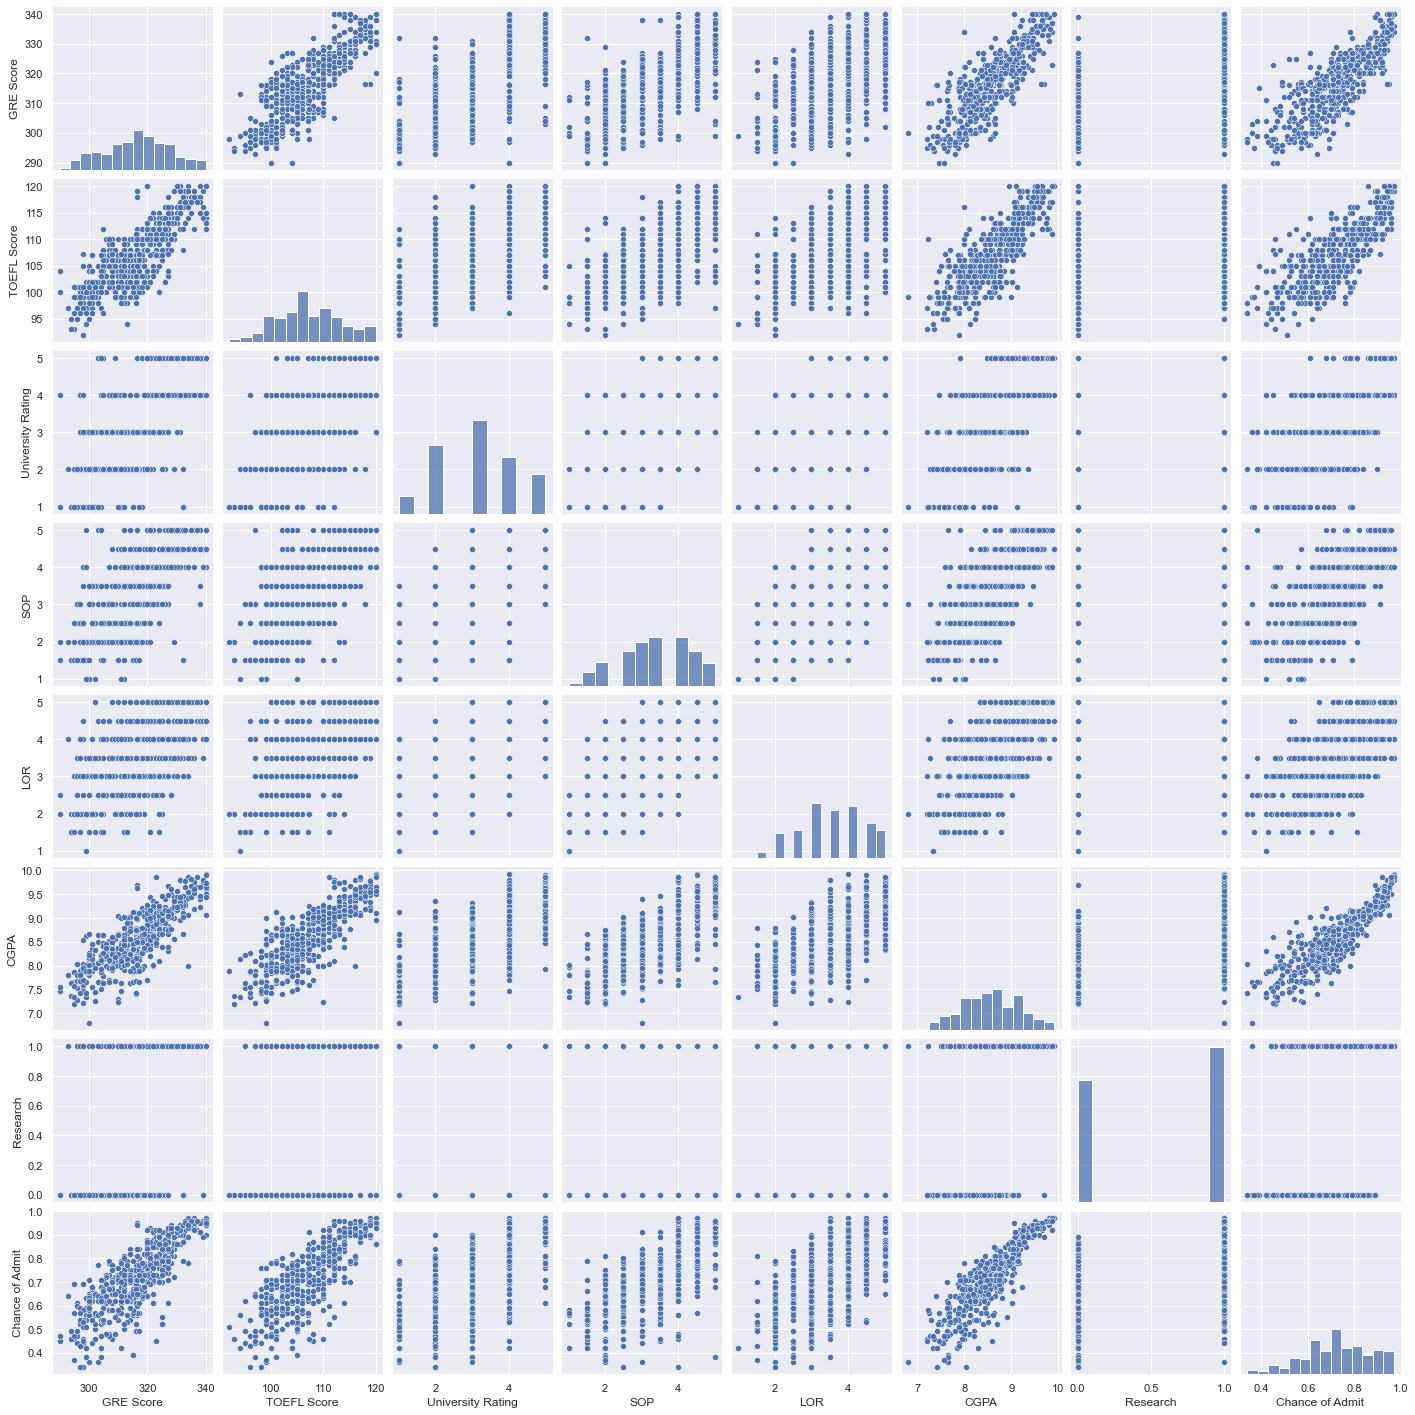

In [9]:
# Columns relationship
sns.pairplot(data)

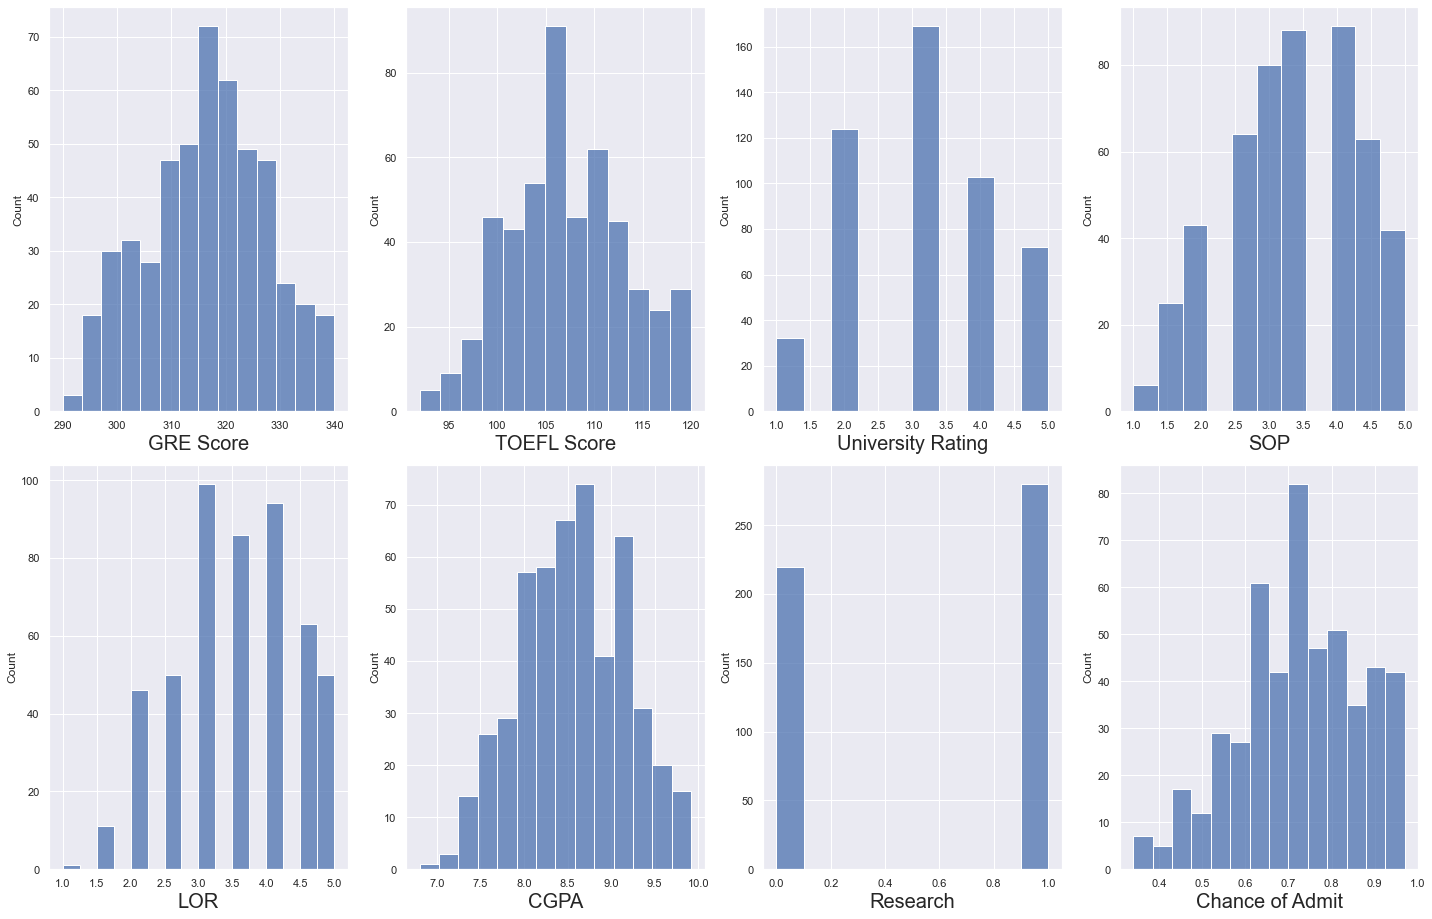

In [10]:
# Plotting colummns relationship with histograms

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        #sns.distplot(data[column])
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

The data looks good

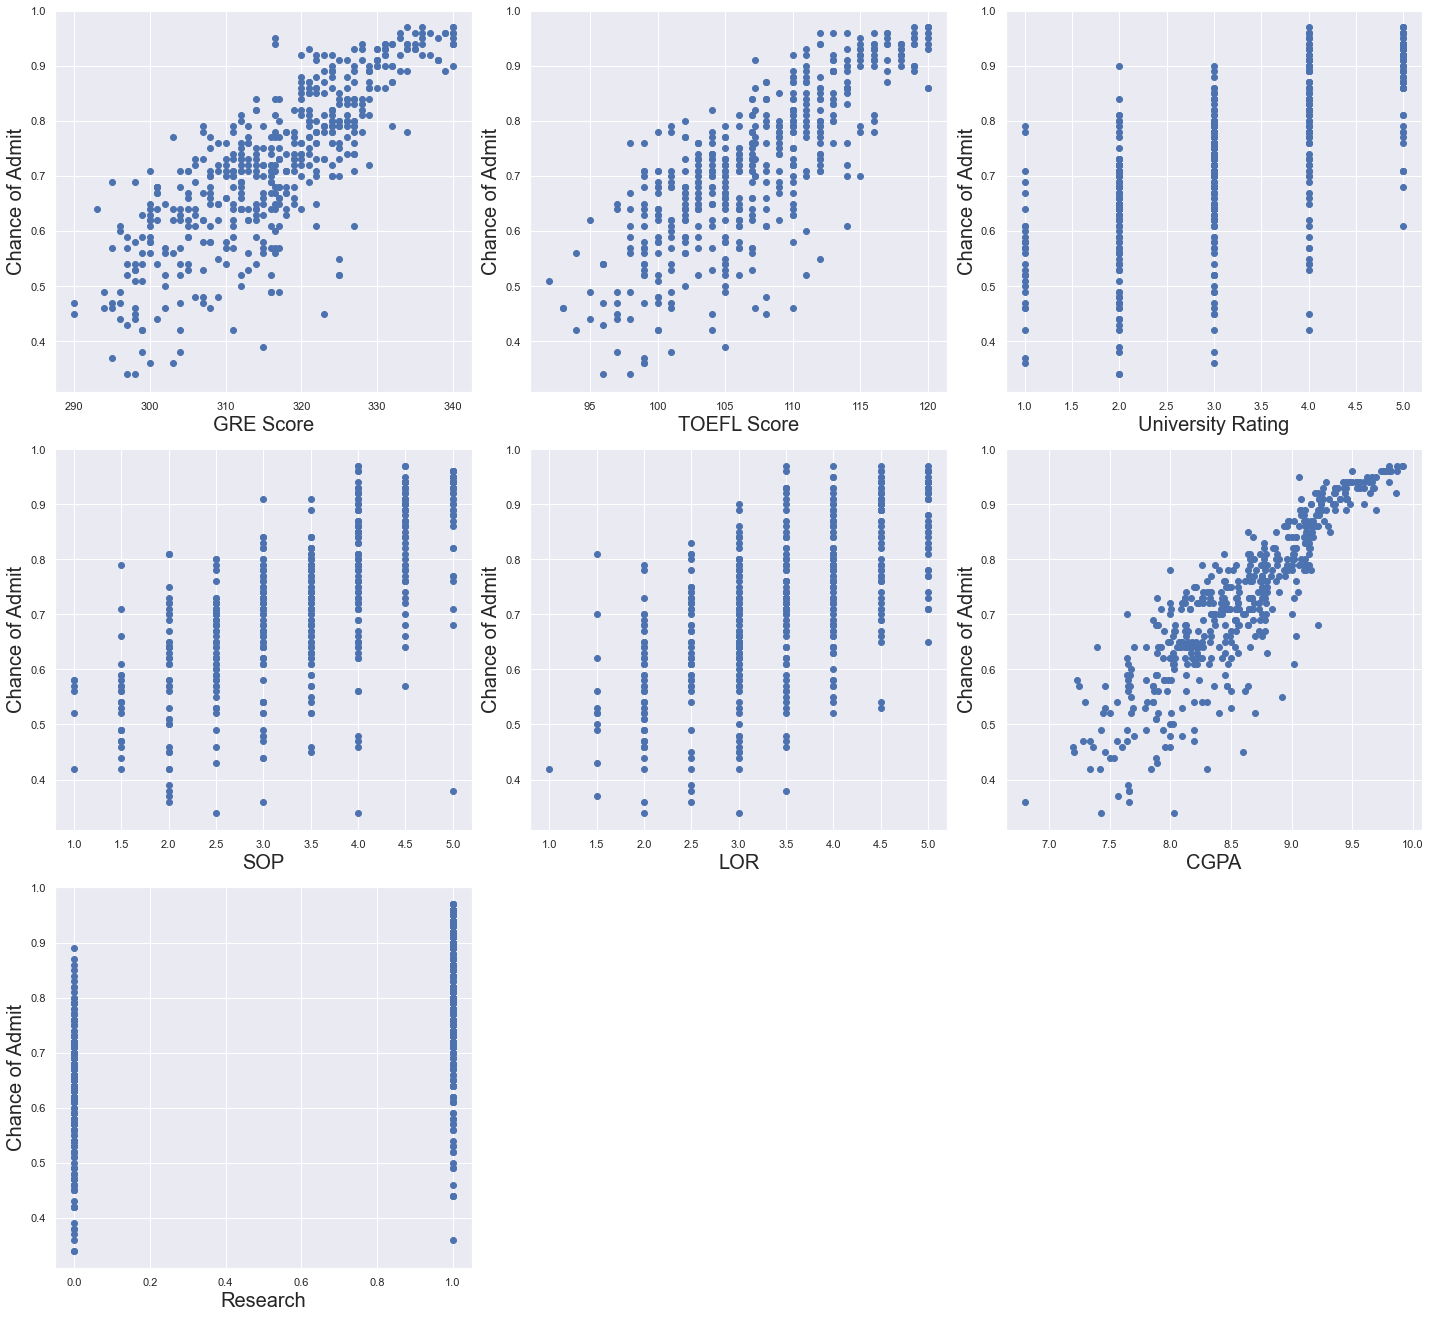

In [5]:
# Relationship between indep. and dependent features
X = data.drop(columns=['Chance of Admit'])
y = data['Chance of Admit']

plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [12]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.819663,0.623394,0.608372,0.527623,0.818347,0.544993,0.802304
TOEFL Score,0.819663,1.000000,0.644296,0.643155,0.535785,0.805557,0.464913,0.786675
University Rating,0.623394,0.644296,1.000000,0.713657,0.606949,0.697704,0.424966,0.681482
SOP,0.608372,0.643155,0.713657,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.527623,0.535785,0.606949,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.818347,0.805557,0.697704,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.544993,0.464913,0.424966,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.802304,0.786675,0.681482,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

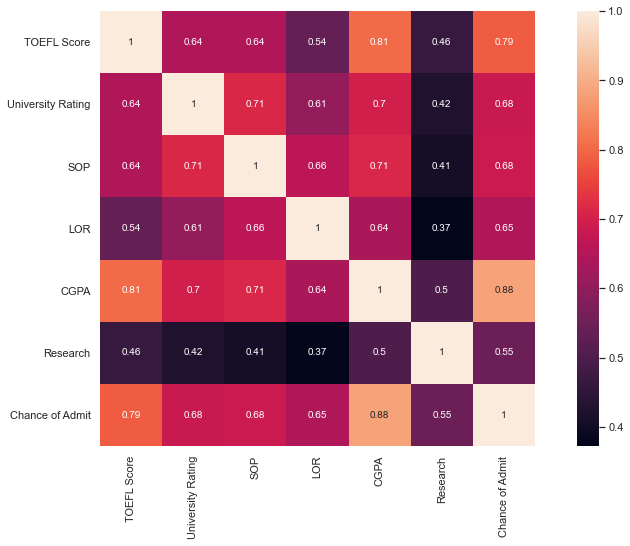

In [13]:
# Another way to show correlation

# Correlation matrix
corre_mat = data.iloc[:,[1,2,3,4,5,6,7]].corr()

fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(corre_mat, vmax=1, square=True, annot=True, ax =ax)


The correlation is OK for most of variables

In [6]:
# Scaling data
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [7]:
# Compute VIF to check multicollienarity: remove fetaures with VIF > 10
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = X_scaled

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif['features'] = X.columns
vif

,VIF,features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


All features seem to be independent enough among them.

In [8]:
# Spliting training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

## Regression Models

### Linear Regression

In [9]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [21]:
# Example Prediction
#loaded_model = pickle.load(open(filename, 'rb'))
model = reg.predict(scaler.transform([[300,110,5,5,5,10,1]]))
#print(model)
print("prediction of ", model*100, "%")

prediction of  [91.54601236] %


In [19]:
# R-Squared Error
reg.score(X_train, y_train)

0.8210910277415142

In [20]:
# adjusted R-Squared Error
def adj_r2(model,x,y):
    r2 = model.score(x,y)
    n = x.shape[0]  # number of rows
    p = x.shape[1]  # number of columns
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [21]:
adj_r2(reg,X_train, y_train)

0.8176785950281371

In [22]:
reg.score(X_test,y_test)

0.8134154719017713

In [23]:
adj_r2(reg, X_test, y_test)

0.8022522950070055

For both training and test datasets R2 and adj-R2 are very similar. Then the model is not being penalized by any feature

### Regularization

#### Lasso

In [24]:
# It returns the best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lasscv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [25]:
# best alpha parameter for Lasso
alpha = lasscv.alpha_
alpha

6.378252983391117e-06

In [26]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=6.378252983391117e-06)

In [27]:
lasso_reg.score(X_test,y_test)

0.8134125678123176

R2 is similar to the initial model. Then we can say that our regression model did not overfit the data

In [28]:
adj_r2(lasso_reg, X_test, y_test)

0.8022492171686102

#### Ridge

In [29]:
# We use an array of random values to find the best alpha
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas=alphas, cv=10, normalize=True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([1.23761811, 7.75471815, 2.48142113, 7.05348675, 6.73363823,
       7.16037229, 5.28044885, 1.61615862, 0.53166574, 2.49631921,
       3.48022554, 8.85089027, 5.88707743, 5.12390671, 0.68936563,
       1.19092484, 6.18512894, 6.46753147, 3.13025222, 6.00627635,
       7.902356  , 4.82405031, 0.97432688, 2.55201473, 9.68205249,
       5.74899653, 4.78521002, 2.08157326, 4.24314978, 1.20642116,
       9.22757047, 4.88034705, 4.91471985, 6.21000863, 4.31854584,
       6.85024977, 1.07289118, 9.27709271, 9.94503685, 6.15715561,
       2.494796  , 6.36684107, 2.15554373, 5.26685103, 0.57542996,
       4.44048487, 9.91265615, 4.00557488, 6.82042436, 1.52637156]),
        cv=10, normalize=True)

In [30]:
# best alpha
ridgecv.alpha_

0.5316657416005488

In [31]:
ridge_reg = Ridge(alpha=ridgecv.alpha_)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5316657416005488)

In [32]:
ridge_reg.score(X_test, y_test)

0.8132506054109867

In [33]:
adj_r2(ridge_reg, X_test, y_test)

0.8020775647090799

#### Elastic Net

In [34]:
elasticCV = ElasticNetCV(alphas=None, cv=10)
elasticCV.fit(X_train, y_train)

ElasticNetCV(cv=10)

In [35]:
# best alpha
elasticCV.alpha_

0.00024514953750068866

In [36]:
# l1_ratio gives how close the model is to L1 regularization
elasticCV.l1_ratio

0.5

In [37]:
elasticnet_reg = ElasticNet(alpha=elasticCV.alpha_, l1_ratio=0.5)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.00024514953750068866)

In [38]:
elasticnet_reg.score(X_test, y_test)

0.8133482908768649

Same situation: Lasso and ElasticNet do not improve R2, then there is no overfitting.

In [39]:
adj_r2(elasticnet_reg, X_test, y_test)

0.8021810946045406

### Regression Plot

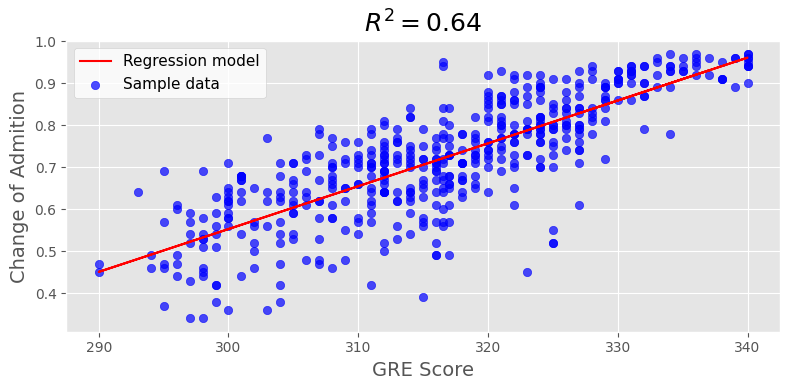

In [40]:
# Let's use GRE score to create a plot. It has a strong correlation with the dependent feature.
X_plot = data['GRE Score'].values.reshape(-1,1)  # no scaling
y_plot = data['Chance of Admit'].values

reg_plot = LinearRegression()
reg_plot.fit(X_plot, y_plot)
response = reg_plot.predict(X_plot)

r2 = reg_plot.score(X_plot, y_plot)

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_plot, response, color='red', label='Regression model')
ax.scatter(X_plot, y_plot, color='blue', alpha=0.7, label='Sample data')
ax.set_ylabel('Change of Admition', fontsize=14)
ax.set_xlabel('GRE Score', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

### Decision Tree

Very useful to find non-linear relationships between features.

In [41]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from sklearn.model_selection GridSearchCV
from sklearn import utils
from sklearn import preprocessing
from IPython.display import Image
import pydotplus

In [42]:
dec_tree = DecisionTreeRegressor(random_state=1)
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [43]:
dec_tree.score(X_test, y_test)

0.5346475515265727

In [44]:
adj_r2(dec_tree, X_test, y_test)

0.5068059520452566

In [45]:
y_pred = dec_tree.predict(X_test)
y_pred

array([0.53, 0.62, 0.97, 0.81, 0.8 , 0.7 , 0.79, 0.52, 0.82, 0.65, 0.63,
       0.44, 0.74, 0.76, 0.79, 0.86, 0.79, 0.84, 0.94, 0.66, 0.64, 0.76,
       0.87, 0.58, 0.8 , 0.7 , 0.96, 0.73, 0.87, 0.56, 0.65, 0.84, 0.63,
       0.91, 0.57, 0.84, 0.56, 0.65, 0.56, 0.9 , 0.61, 0.59, 0.81, 0.97,
       0.8 , 0.63, 0.48, 0.54, 0.71, 0.71, 0.86, 0.91, 0.92, 0.46, 0.8 ,
       0.66, 0.77, 0.67, 0.73, 0.71, 0.57, 0.71, 0.71, 0.83, 0.96, 0.67,
       0.71, 0.77, 0.95, 0.7 , 0.65, 0.54, 0.84, 0.47, 0.91, 0.48, 0.87,
       0.95, 0.75, 0.81, 0.9 , 0.69, 0.94, 0.8 , 0.87, 0.61, 0.87, 0.94,
       0.38, 0.68, 0.66, 0.77, 0.64, 0.71, 0.74, 0.84, 0.87, 0.61, 0.72,
       0.69, 0.72, 0.72, 0.38, 0.57, 0.77, 0.46, 0.68, 0.74, 0.64, 0.73,
       0.47, 0.85, 0.94, 0.85, 0.54, 0.59, 0.59, 0.75, 0.62, 0.84, 0.84,
       0.54, 0.59, 0.91, 0.7 ])

In [46]:
# Singular prediciton
X_example = scaler.transform([[300,110,5,5,5,10,1]])
y_pred = dec_tree.predict(X_example)
y_pred

array([0.95])

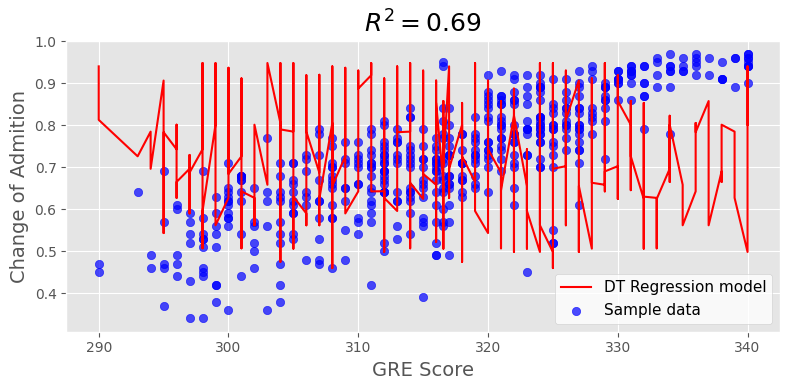

In [47]:
# Plotting the Decision Tree Regression on GRE Score for understanding

X_plot = data['GRE Score'].values.reshape(-1,1)  # no scaling
y_plot = data['Chance of Admit'].values

dec_tree_plot = DecisionTreeRegressor()
dec_tree_plot.fit(X_plot, y_plot)

x_plot = pd.DataFrame(X_plot, columns=['GRE Score'])
response = dec_tree_plot.predict(X_plot)

r2 =dec_tree_plot.score(X_plot, y_plot)

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x_plot['GRE Score'].sort_values(), response, color='red', label='DT Regression model')
ax.scatter(X_plot, y_plot, color='blue', alpha=0.7, label='Sample data')
ax.set_ylabel('Change of Admition', fontsize=14)
ax.set_xlabel('GRE Score', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

The R2 value changes a little bit because the regression has been calculated based on 'GRE Score'.

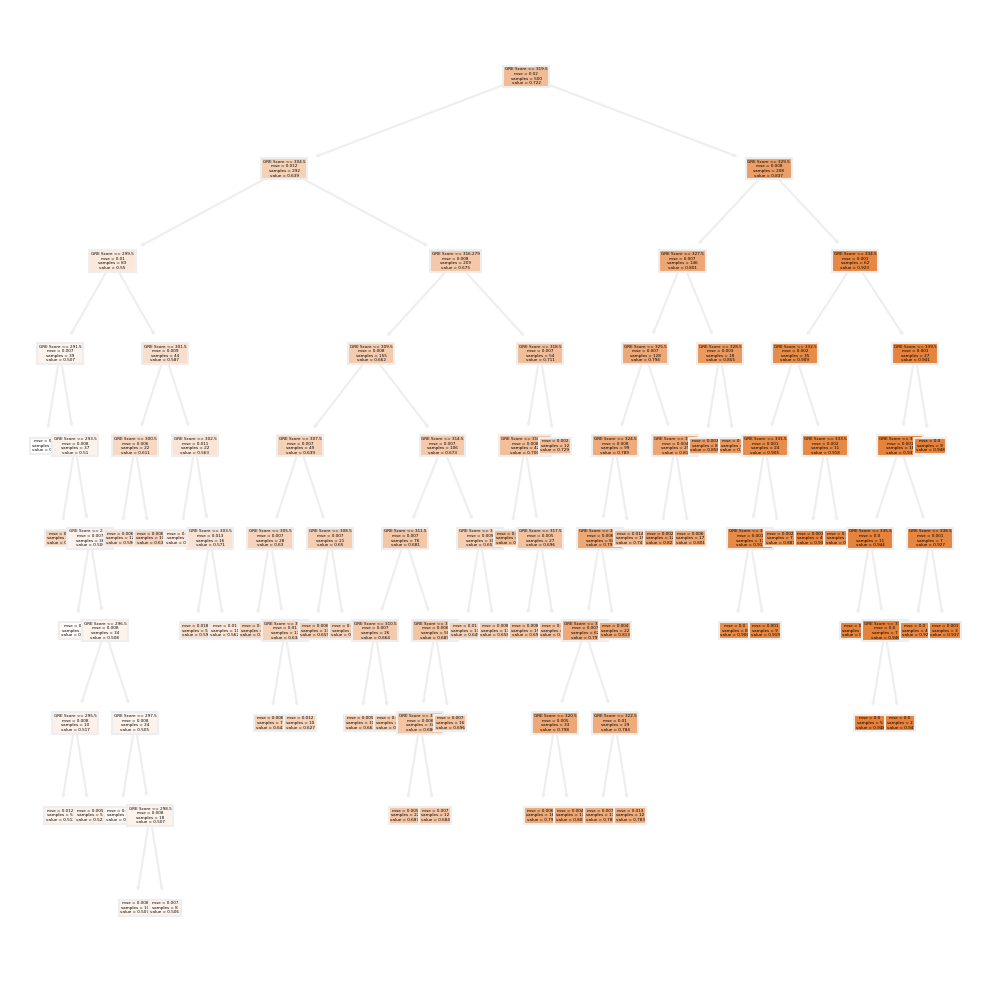

In [48]:
# Visualize Tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
graph =tree.plot_tree(dec_tree_plot, feature_names=['GRE Score'], class_names=str([1,0]), filled=True)

#### Hyperparmater tunning

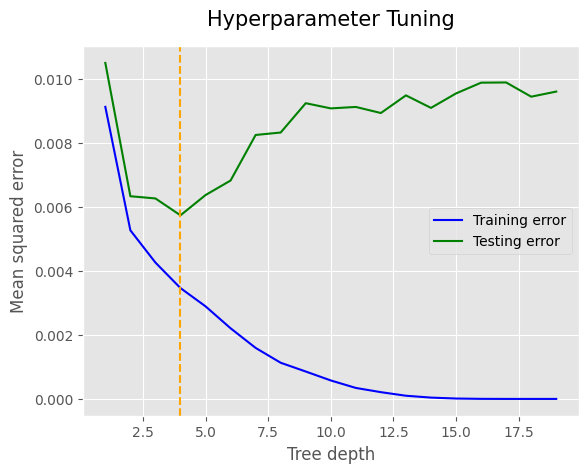

In [49]:
# Tree depth

from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 20)
training_error = []

for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth, random_state=1)
    model_1.fit(X, y)
    training_error.append(mse(y, model_1.predict(X)))
    
testing_error = []

for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(mse(y_test, model_2.predict(X_test)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=4, color='orange', linestyle='--')
plt.annotate('optimum = 4', xy=(7.5, 1.17), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.savefig('error.png')

The testing error starts to increase at depth=4. That is our optimum max_depth hyperparameter.

In [50]:
grid_param = {
    'criterion': ["mse"],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']  
}

grid_search = GridSearchCV(dec_tree, 
                           param_grid=grid_param, 
                           cv=5, 
                           n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 21600 out of 21600 | elapsed:   59.5s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=1)

In [51]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
dec_tree = DecisionTreeRegressor(criterion='mse',
                                 max_depth=6,
                                 min_samples_leaf=6,
                                 min_samples_split=2,
                                 splitter='best')
dec_tree.fit(X_train, y_train)

In [53]:
dec_tree.score(X_test, y_test)

0.7342948195800916

In [54]:
adj_r2(dec_tree, X_test, y_test)

0.7183979284438577

Score improved respect to the initial decision tree.

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

rand_for = RandomForestRegressor(random_state=1)
rand_for.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [56]:
rand_for.score(X_train, y_train)

0.9716675843316538

In [57]:
rand_for.score(X_test, y_test)

0.7659560648594834

In [58]:
adj_r2(rand_for, X_test, y_test)

0.7519534362613329

There is overfitting, the model is very well trained but not that so well generalized.

In [59]:
# Hyperparameter tunning

grid_param = {
    #"n_estimators" : [90,100,115,130],
    'n_estimators': [90],
    'criterion': ['mse'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

grid_search = GridSearchCV(rand_for, 
                           param_grid=grid_param, 
                           cv=5, 
                           n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 12960 out of 12960 | elapsed: 37.3min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90]},
             scoring='neg_mean_squared_error', verbose=1)

In [60]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'n_estimators': 90}

In [87]:
rand_for = RandomForestRegressor(criterion='mse',
                                 max_depth=7,
                                 max_features = 'log2',
                                 min_samples_leaf=1,
                                 min_samples_split=9,
                                 n_estimators=90,
                                 random_state=1)
rand_for.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features='log2', min_samples_split=9,
                      n_estimators=90, random_state=1)

In [88]:
rand_for.score(X_test, y_test)

0.7854489423982502

There is imporvement.

### KNN

In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [64]:
knn.score(X_train, y_train)

0.8410104759787007

In [65]:
knn.score(X_test, y_test)

0.7739017195716544

In [66]:
# Hyperparameter tunning
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

grid_search = GridSearchCV(knn, param_grid, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:    2.6s finished


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=1)

In [67]:
grid_search.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 13}

In [68]:
knn = KNeighborsRegressor(algorithm='ball_tree',
                         leaf_size=18,
                         n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=18, n_neighbors=13)

In [69]:
knn.score(X_test, y_test)

0.7784595669082246

The hyperparamter tunning does not improved the accuracy.

### Support Vector Machines

In [70]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(X_train, y_train)

SVR()

In [71]:
svm.score(X_train, y_train)

0.7781128151140674

In [72]:
svm.score(X_test, y_test)

0.7305443943931094

In [73]:
# Hyperparameter tunning
param_grid={'C':[0.1,1,10,50,100,500],
            'gamma':[1,0.5,0.1,0.01,0.001]}

grid_search = GridSearchCV(svm, param_grid, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50, 100, 500],
                         'gamma': [1, 0.5, 0.1, 0.01, 0.001]},
             verbose=1)

In [74]:
grid_search.best_params_

{'C': 10, 'gamma': 0.001}

In [75]:
svm = SVR(C=10, gamma=0.001)
svm.fit(X_train, y_train)

SVR(C=10, gamma=0.001)

In [76]:
svm.score(X_test, y_test)

0.7818551967731311

###  Accuracy Results

In [77]:
results = pd.DataFrame()
results['Model'] = ['Linear Regression', 
                    'Lasso', 
                    'Ridge',
                    'ElasticNet',
                    'Decision Tree',
                    'Random Forest',
                    'KNN',
                    'SVM']

results['R2'] = [reg.score(X_test, y_test),
                 lasso_reg.score(X_test, y_test),
                 ridge_reg.score(X_test, y_test),
                 elasticnet_reg.score(X_test, y_test),
                 dec_tree.score(X_test, y_test),
                 rand_for.score(X_test, y_test),
                 knn.score(X_test, y_test),
                 svm.score(X_test, y_test)]

results['R2-adj'] = [adj_r2(reg, X_test, y_test),
                     adj_r2(lasso_reg, X_test, y_test),
                     adj_r2(ridge_reg, X_test, y_test),
                     adj_r2(elasticnet_reg, X_test, y_test),
                     adj_r2(dec_tree, X_test, y_test),
                     adj_r2(rand_for, X_test, y_test),
                     adj_r2(knn, X_test, y_test),
                     adj_r2(svm, X_test, y_test)]
results

,Model,R2,R2-adj
0,Linear Regression,0.813415,0.802252
1,Lasso,0.813413,0.802249
2,Ridge,0.813251,0.802078
3,ElasticNet,0.813348,0.802181
4,Decision Tree,0.734295,0.718398
5,Random Forest,0.785449,0.772613
6,KNN,0.778460,0.765205
7,SVM,0.781855,0.768804


Linear Regression, Lasso, Ridge and ElacticNet have similar accuracy. Any of them are OK for production.

In [15]:
# Save the best model for production

with open('finalizedModel.pickle', 'wb') as f:
    pickle.dump(reg, f)
    
with open('standardScalar.pickle', 'wb') as f:
    pickle.dump(scaler,f)

In [22]:
scaler_function = 'standardScalar.pickle'
scaler = pickle.load(open(scaler_function, 'rb'))

# loading the model file from the storage
filename = 'finalizedModel.pickle'
loaded_model = pickle.load(open(filename, 'rb'))  

# predictions using the loaded model file
scaled_data = scaler.transform([[300,110,5,5,5,10,1]])
prediction=loaded_model.predict(scaled_data)
print('prediction is', prediction)

#model = reg.predict(scaler.transform([[300,110,5,5,5,10,1]]))

prediction is [0.91546012]
